In [16]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [17]:
#'MinTemp','MaxTemp','Rainfall','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday','RainTomorrow'
df=pd.read_csv('weatherAUS.csv')''

In [18]:
df=df.dropna()
df=df.reset_index(drop=True)

df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

In [36]:
#Normalising the data
scaler=StandardScaler()
df[['MinTemp_T','MaxTemp_T','Rainfall_T','WindGustSpeed_T', 'WindSpeed9am_T', 'WindSpeed3pm_T','Humidity9am_T','Humidity3pm_T','Pressure9am_T','Pressure3pm_T','Cloud9am_T','Cloud3pm_T','Temp9am_T','Temp3pm_T','RainToday_T','RainTomorrow_T']]=scaler.fit_transform(df[['MinTemp','MaxTemp','Rainfall','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday','RainTomorrow']])


In [37]:
data=df.values
x=data[:,23:-2]
y=data[:,-1].reshape(-1,1)

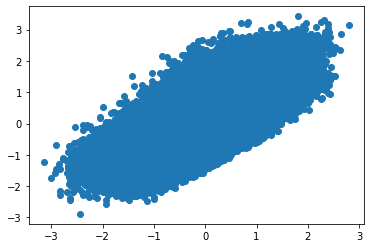

In [38]:
#different y value
plt.scatter(df[df.columns[23]],df[df.columns[24]])
plt.show()

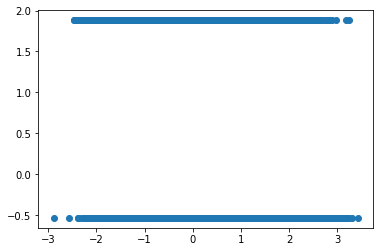

In [39]:
plt.scatter(df[df.columns[24]],y)
plt.show()

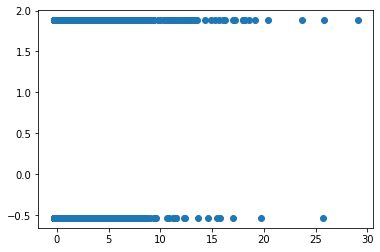

In [40]:
plt.scatter(df[df.columns[25]],y)
plt.show()

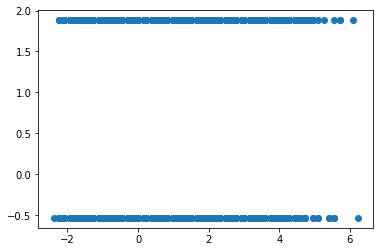

In [41]:
plt.scatter(df[df.columns[26]],y)
plt.show()

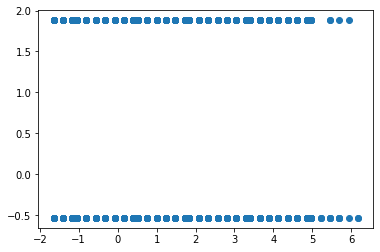

In [42]:
plt.scatter(df[df.columns[27]],y)
plt.show()

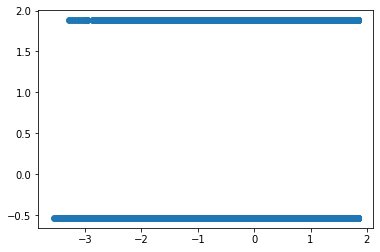

In [43]:
plt.scatter(df[df.columns[29]],y)
plt.show()

In [44]:
#x features
columns_x=df.columns[23:-1]

In [45]:
#elbow function
def elbow_func(data, k_max):
    means=[]
    inertias=[]
    
    for k in range(1, k_max):
        kmeans=KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    #genertate the elbow plot
    fig= plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

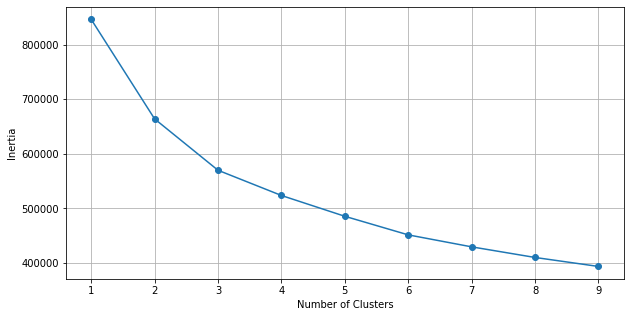

In [46]:
#elbow_func(df[df.columns[[27,-1]]],10)
elbow_func(df[columns_x],10)

In [47]:
#applying kmeans clustering
kmeans=KMeans(n_clusters=3)
kmeans.fit(df[columns_x])

KMeans(n_clusters=3)

In [48]:
df['kmeans_3']=kmeans.labels_
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm_T,Pressure9am_T,Pressure3pm_T,Cloud9am_T,Cloud3pm_T,Temp9am_T,Temp3pm_T,RainToday_T,RainTomorrow_T,kmeans_3
0,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,-1.812261,-1.583303,-1.513002,-0.801428,0.254411,1.278186,1.563621,-0.532445,-0.531485,0
1,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,-2.059824,-0.628068,-0.392322,-1.158937,-1.256603,0.318980,0.627467,-0.532445,-0.531485,0
2,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,-1.366647,-0.714907,-0.814396,-1.158937,0.632165,1.597921,1.783032,-0.532445,-0.531485,0
3,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,-1.366647,-0.657014,-0.828951,-1.158937,0.254411,1.658823,1.885424,-0.532445,-0.531485,0
4,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,-1.713236,-0.946479,-1.076373,-1.158937,0.632165,2.343970,2.177972,-0.532445,-0.531485,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,-0.871521,-0.483335,-0.625191,-1.516445,-1.256603,0.958451,1.402719,-0.532445,-0.531485,0
56416,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,-1.069571,-0.382022,-0.523311,0.986113,-1.634357,1.004127,1.358837,-0.532445,-0.531485,0
56417,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,-1.317135,-0.280710,-0.435985,-1.516445,-1.634357,1.004127,1.373465,-0.532445,-0.531485,0
56418,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,0.415808,-0.338603,-0.596082,-1.158937,-1.256603,1.004127,0.949270,-0.532445,-0.531485,0


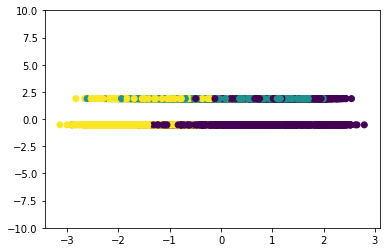

In [49]:
#plt.scatter(df[df.columns[x_parameter]],y,c=df['kmeans_3'])
plt.scatter(df[df.columns[23]],df[df.columns[-2]],c=df['kmeans_3'])
#plt.xlim(-2,6.3)
plt.ylim(-10,10)
plt.show()

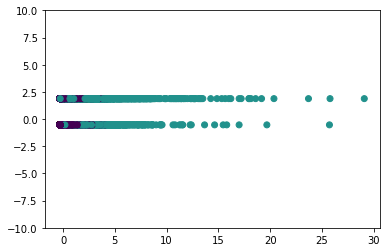

In [50]:
#plt.scatter(df[df.columns[x_parameter]],y,c=df['kmeans_3'])
plt.scatter(df[df.columns[25]],df[df.columns[-2]],c=df['kmeans_3'])
#plt.xlim(-2,6.3)
plt.ylim(-10,10)
plt.show()

In [51]:
#centroids and their attributres
clusters=kmeans.cluster_centers_
print(clusters)

[[ 0.70380098  0.9350787  -0.25185357  0.05478188  0.02988638  0.08560871
  -0.62348    -0.51740169 -0.376122   -0.47418639 -0.3744839  -0.37951414
   0.86409009  0.93219463 -0.39618277]
 [ 0.0595989  -0.50537469  0.73988191  0.72082302  0.54124643  0.53331489
   0.58219874  0.81070058 -0.66793475 -0.50274394  0.72602899  0.72293181
  -0.23005451 -0.56048488  1.02692269]
 [-0.8124292  -0.6868097  -0.2205078  -0.54423165 -0.39630456 -0.4521314
   0.29324312  0.02336159  0.86137341  0.858053   -0.07662067 -0.06902003
  -0.79380872 -0.6466321  -0.25488918]]
